In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [2]:
def circle(nx : int, ny: int, rad: int):
    '''funcion para construir circulos'''
    assert rad < min(nx,ny), 'el circulo debe estar completamente dentro'
    canvas = np.zeros(shape=(nx,ny))
    for i in range(nx):
        for j in range(ny):
            if ((i-nx//2)**2 + (j-ny//2)**2 < rad**2):
                canvas[i,j] = 1
    return canvas    

def square(nx : int, ny: int, length: int):
    '''funcion para construir cuadradillos'''
    assert length < min(nx,ny)
    canvas = np.ones(shape=(nx,ny))
    for i in range(nx):
        for j in range(ny):
            if (np.abs(i-nx//2) > length) or (np.abs(j-ny//2) > length):
                canvas[i,j] = 0
    return canvas    

In [4]:
nx = 50
ny = 50
rng = np.random.default_rng()
y_train = rng.integers(0,2,200)
x_train = []
for i in y_train:
    if i == 0:
        x_train.append(circle(nx, ny, rng.integers(1,25)))
    else:
        x_train.append(square(nx, ny, rng.integers(1,25)))

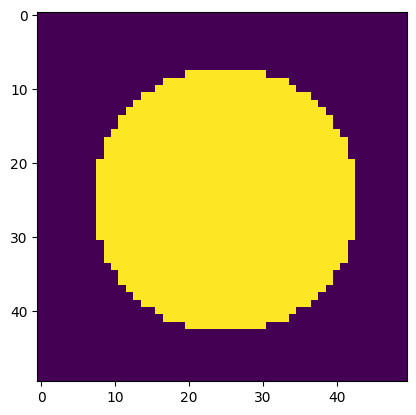

In [6]:
plt.imshow(x_train[0])

In [ ]:
class Model(torch.nn.Module):
    def __init__(self):
        super().__init__()

        self.conv1 = torch.nn.Conv2d(in_channels=1,
                                     out_channels=8,
                                     kernel_size=(3,3),
                                     padding = (1,1),
                                     stride = (1,1)) 
        # 8, 50x50
        self.act1  = torch.nn.ReLU()
        self.pool1 = torch.nn.MaxPool2d(kernel_size=(2,2))
        # 8, 25x25
        self.conv2 = torch.nn.Conv2d(in_channels = 8, 
                                     out_channels=16, 
                                     kernel_size=3, 
                                     stride=1, 
                                     padding=1)
        # 16, 25x25
        self.act2  = torch.nn.ReLU()
        self.pool2 = torch.nn.MaxPool2d(2)
        # 16, 12,12 ????
        self.lin   = torch.nn.Linear(in_features = 16*12*12, 
                                     out_features = 2)
        self.sigm  = torch.nn.Sigmoid()

    def forward(self, x):
        x = self.conv1(x)
        print('conv1', x.shape)
        x = self.act1(x)
        print('act1', x.shape)
        x = self.pool1(x)
        print('pool1', x.shape)
        return x


